In [1]:
import numpy as np
import pandas as pd
import googlemaps
import csv
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import geopandas
import plotly.express as px

In [2]:
gmaps = googlemaps.Client(key = "ENTER YOUR GOOGLE MAPS API KEY HERE")
Locations = []

ImportList = input("Load previously saved csv file location list?\nEnter'Y' for yes and 'N' for no\n")
if (ImportList == 'Y'):
    with open("C:\TV\Locations.csv",newline='') as f:
        reader = csv.reader(f)
        Locations = list(reader)
        
    for i in range(len(Locations)):
        Locations[i] = Locations[i][0]

Entry = input("Enter place to visit:\nEnter 'stop' to stop\n")
while (Entry != 'stop'):
    if (Entry not in Locations):
        Locations.append(Entry)
    Entry = input("Enter place to visit:\n Enter 'stop' to stop\n")

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
C:\Users\imtha\AppData\Local\Temp\ipykernel_6592\3173739423.py:6: SyntaxWarning: invalid escape sequence '\T'
  with open("C:\TV\Locations.csv",newline='') as f:


Load previously saved csv file location list?
Enter'Y' for yes and 'N' for no
 Y
Enter place to visit:
Enter 'stop' to stop
 stop


In [3]:
print(Locations)

['Champaign, IL', 'Chicago, IL', 'Miami, FL', 'San Diego, CA', 'New York, NY', 'Boston, MA', 'Seattle, WA', 'Portland, OR', 'San Francisco, CA', 'Denver, CO', 'Pittsburgh, PA', 'Yellowstone National Park, WY', 'Minneapolis, MN', 'Zion National Park, UT', 'Canyonlands National Park, UT', 'Nashville, TN', 'Glacier National Park, MT', 'Knoxville, TN', 'Yosemite National Park, CA', 'Los Angeles, CA', 'Las Vegas, NV', 'St. Louis, MO', 'Albuquerque, NM', 'New Orleans, LA']


In [4]:
RemoveLoc = input("Remove any location? 'Y' for yes and 'N' for no\n")
if RemoveLoc == 'Y':
    LocEntry = input("Enter Location:\n")
    Locations.remove(LocEntry)

Remove any location? 'Y' for yes and 'N' for no
 N


In [5]:
print(Locations)

['Champaign, IL', 'Chicago, IL', 'Miami, FL', 'San Diego, CA', 'New York, NY', 'Boston, MA', 'Seattle, WA', 'Portland, OR', 'San Francisco, CA', 'Denver, CO', 'Pittsburgh, PA', 'Yellowstone National Park, WY', 'Minneapolis, MN', 'Zion National Park, UT', 'Canyonlands National Park, UT', 'Nashville, TN', 'Glacier National Park, MT', 'Knoxville, TN', 'Yosemite National Park, CA', 'Los Angeles, CA', 'Las Vegas, NV', 'St. Louis, MO', 'Albuquerque, NM', 'New Orleans, LA']


In [6]:
ImportedDistanceMatrix = np.genfromtxt("C:\TV\Distance.csv",delimiter=",")
# ImportedDistanceMatrix

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\imtha\AppData\Local\Temp\ipykernel_6592\408715196.py:1: SyntaxWarning: invalid escape sequence '\T'
  ImportedDistanceMatrix = np.genfromtxt("C:\TV\Distance.csv",delimiter=",")


In [7]:
DistanceMatrix = np.zeros((len(Locations),len(Locations)))

if RemoveLoc == 'N':

    for i in range(len(Locations)):
        for j in range(len(Locations)):
            if ((i < len(ImportedDistanceMatrix)) and (j < len(ImportedDistanceMatrix))):
                DistanceMatrix[i][j] = ImportedDistanceMatrix[i][j]
            else:
                TestGeoCode = gmaps.distance_matrix(Locations[i],Locations[j])
                if (i != j):
                    if (TestGeoCode['rows'][0]['elements'][0]['status'] == 'OK'):
                        DistanceMatrix[i][j] = TestGeoCode['rows'][0]['elements'][0]['distance']['value']/1000
                    else:
                        DistanceMatrix[i][j] = np.inf
if RemoveLoc == 'Y':
    
    for i in range(len(Locations)):
        for j in range(len(Locations)):
                TestGeoCode = gmaps.distance_matrix(Locations[i],Locations[j])
                if (i != j):
                    if (TestGeoCode['rows'][0]['elements'][0]['status'] == 'OK'):
                        DistanceMatrix[i][j] = TestGeoCode['rows'][0]['elements'][0]['distance']['value']/1000
                    else:
                        DistanceMatrix[i][j] = np.inf    


In [8]:
# DistanceMatrix = np.zeros((len(Locations),len(Locations)))

# for i in range(len(Locations)):
#     for j in range(len(Locations)):
#         if (TestGeoCode['rows'][i]['elements'][j]['status'] == 'OK'):
#             DistanceMatrix[i][j] = TestGeoCode['rows'][i]['elements'][j]['distance']['value']/1000
#         else:
#             DistanceMatrix[i][j] = np.inf


for i in range(len(Locations)):
    InfCount = 0
    for j in range(len(Locations)):
        if (DistanceMatrix[i][j] == np.inf):
            InfCount += 1
    if InfCount == len(Locations):
        DistanceMatrix = np.delete(DistanceMatrix, (i), axis=0)
        DistanceMatrix = np.delete(DistanceMatrix, (i), axis=1)
        Locations.pop(i)
    
print(DistanceMatrix)

[[   0.     217.303 2065.615 3205.962 1339.121 1725.153 3372.078 3413.62
  3426.643 1602.827  774.449 2184.444  824.819 2561.286 2290.24   605.703
  2631.431  772.88  3131.185 3228.372 2805.55   291.365 1966.597 1279.191]
 [ 217.922    0.    2218.407 3341.752 1271.288 1583.278 3321.13  3439.008
  3423.616 1612.242  742.656 2154.719  658.288 2567.559 2296.513  758.496
  2464.899  870.303 3128.157 3242.362 2811.822  477.496 2152.728 1491.868]
 [2069.009 2221.719    0.    4278.55  2063.249 2405.972 5310.77  5250.387
  4890.341 3324.629 1893.196 4021.217 2889.228 3942.81  3720.05  1469.443
  4595.973 1411.358 4617.384 4400.238 4070.856 1960.639 3149.276 1393.934]
 [3199.208 3351.477 4273.077    0.    4441.415 4827.446 2022.006 1743.526
   809.807 1743.186 3876.742 1728.539 3206.021  783.088 1296.875 3198.319
  2260.708 3486.098  644.765  193.654  542.455 2911.16  1240.1   2923.06 ]
 [1334.605 1271.039 2074.404 4443.263    0.     346.446 4589.136 4707.014
  4669.855 2858.115  594.374 3422.7

In [9]:
print(Locations)

['Champaign, IL', 'Chicago, IL', 'Miami, FL', 'San Diego, CA', 'New York, NY', 'Boston, MA', 'Seattle, WA', 'Portland, OR', 'San Francisco, CA', 'Denver, CO', 'Pittsburgh, PA', 'Yellowstone National Park, WY', 'Minneapolis, MN', 'Zion National Park, UT', 'Canyonlands National Park, UT', 'Nashville, TN', 'Glacier National Park, MT', 'Knoxville, TN', 'Yosemite National Park, CA', 'Los Angeles, CA', 'Las Vegas, NV', 'St. Louis, MO', 'Albuquerque, NM', 'New Orleans, LA']


In [10]:
SaveList = input("Save locations and distances?\nEnter 'Y' for yes 'N' for no\n")

if (SaveList == 'Y'):
    with open("C:\TV\Locations.csv","w",newline='') as f:
        write = csv.writer(f,dialect='excel')
        for i in Locations:
            write.writerow([i])
    print("Location file saved")
    
    np.savetxt("C:\TV\Distance.csv", DistanceMatrix,
              delimiter=",")
    print("Distance file saved")

<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\imtha\AppData\Local\Temp\ipykernel_6592\645333178.py:4: SyntaxWarning: invalid escape sequence '\T'
  with open("C:\TV\Locations.csv","w",newline='') as f:
C:\Users\imtha\AppData\Local\Temp\ipykernel_6592\645333178.py:10: SyntaxWarning: invalid escape sequence '\T'
  np.savetxt("C:\TV\Distance.csv", DistanceMatrix,


Save locations and distances?
Enter 'Y' for yes 'N' for no
 Y


Location file saved
Distance file saved


In [11]:
model = gp.Model("RouteTSP")

x = model.addVars(len(Locations), len(Locations), name = "X", vtype = GRB.BINARY)

u = model.addVars(len(Locations), name="U", vtype=GRB.INTEGER,lb=1,ub=len(Locations))

RouteDistance = 0

for i in range(len(Locations)):
    for j in range(len(Locations)):
        RouteDistance += DistanceMatrix[i][j] * x[i,j]
        
InFlowConstraints = model.addConstrs(x.sum(i,"*") == 1 for i in range(1,len(Locations)))

OutFlowConstraints = model.addConstrs(x.sum("*",i) == 1 for i in range(1,len(Locations)))

StartFlowConstraint = model.addConstr(x.sum(0,"*") == 1)

EndFlowConstraint = model.addConstr(x.sum("*",0) == 1)

SubTourEliminationConstraints = model.addConstrs(u[i] - u[j] + 1 <= (len(Locations) - 1) * (1 - x[i,j]) for i in range(1,len(Locations)) for j in range(1,len(Locations)))

StayProhibitionConstraints = model.addConstrs(x[i,i] == 0 for i in range(len(Locations)))

model.setObjective(RouteDistance, GRB.MINIMIZE)
model.optimize()

if (model.Status == GRB.OPTIMAL):
    print("\n\n\n*********\nSolution Found\n*********")
    xValue = model.getAttr("X",x)
    obj = model.getObjective()
#     for i in range(len(Locations)):
#         for j in range(len(Locations)):
#             if (xValue[i,j] > 0):
#                 print("We visit",Locations[j], "from",Locations[i])
    print("Order of routing:")
    next = np.zeros(len(Locations))
    Routing = [0]
    for i in range(len(Locations)):
        for j in range(len(Locations)):
            if xValue[i,j] > 0:
                next[i] = j
    current = 0
    while next[current] != 0:
        Routing.append(int(next[current]))
        current = int(next[current])
        
    Routing.append(0)
    # print(Routing)
    RouteString = ""
    Count = 0
    for i in Routing:
        if (Count < len(Locations)+1) and (Count > 0):
            RouteString += " -> "
        RouteString += Locations[i]
        Count += 1
    print(RouteString)
    print("The route takes",obj.getValue(),"kilometers.")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-21
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1250U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 601 rows, 600 columns and 2717 nonzeros
Model fingerprint: 0x5b29b95b
Variable types: 0 continuous, 600 integer (576 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e+02, 5e+03]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 2e+01]
Presolve removed 47 rows and 25 columns
Presolve time: 0.02s
Presolved: 554 rows, 575 columns, 2622 nonzeros
Variable types: 0 continuous, 575 integer (552 binary)
Found heuristic solution: objective 51912.051000
Found heuristic solution: objective 51635.585000

Root relaxation: objective 1.254933e+04, 85 iterations, 0.00 seconds (0.00 work units)

    Node

In [12]:
RouteDistance = DistanceMatrix
LocationDict = {i:Locations[i] for i in range(len(Locations))}

for i in range(len(Locations)):
    for j in range(len(Locations)):
        if (xValue[i,j] > 0.1):
            RouteDistance[i][j] *= xValue[i,j]
        else:
            RouteDistance[i][j] *= 0

In [13]:
Latitudes = np.zeros(len(Locations))
Longitudes = np.zeros(len(Locations))
for i in range(len(Locations)):
    Latitudes[i] = gmaps.geocode(Locations[i])[0]['geometry']['location']['lat']
    Longitudes[i] = gmaps.geocode(Locations[i])[0]['geometry']['location']['lng']

Latitudes

array([40.1164204, 41.8781136, 25.7616798, 32.715738 , 40.7127753,
       42.3600825, 47.6061389, 45.515232 , 37.7749295, 39.7392358,
       40.4406248, 44.5979182, 44.977753 , 37.2982022, 38.1632525,
       36.1626638, 48.7596128, 35.9606384, 37.8651011, 34.0549076,
       36.171563 , 38.6270025, 35.0843859, 29.9510658])

In [14]:
Longitudes

array([ -88.2433829,  -87.6297982,  -80.1917902, -117.1610838,
        -74.0059728,  -71.0588801, -122.3328481, -122.6783853,
       -122.4194155, -104.990251 ,  -79.9958864, -110.561249 ,
        -93.2650108, -113.0263005, -109.7626512,  -86.7816016,
       -113.7870225,  -83.9207392, -119.5383294, -118.242643 ,
       -115.1391009,  -90.1994042, -106.650422 ,  -90.0715323])

In [15]:
Locations

['Champaign, IL',
 'Chicago, IL',
 'Miami, FL',
 'San Diego, CA',
 'New York, NY',
 'Boston, MA',
 'Seattle, WA',
 'Portland, OR',
 'San Francisco, CA',
 'Denver, CO',
 'Pittsburgh, PA',
 'Yellowstone National Park, WY',
 'Minneapolis, MN',
 'Zion National Park, UT',
 'Canyonlands National Park, UT',
 'Nashville, TN',
 'Glacier National Park, MT',
 'Knoxville, TN',
 'Yosemite National Park, CA',
 'Los Angeles, CA',
 'Las Vegas, NV',
 'St. Louis, MO',
 'Albuquerque, NM',
 'New Orleans, LA']

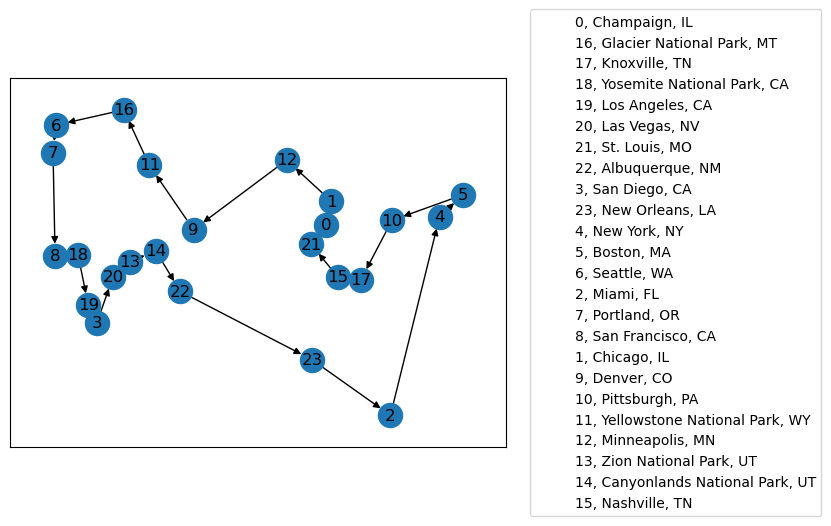

In [16]:

G = nx.from_numpy_array(RouteDistance)

G = nx.DiGraph()

for i in range(len(Locations)):
    G.add_node(i, pos = (Longitudes[i], Latitudes[i]))
    for j in range(len(Locations)):
        if (RouteDistance[i][j] != 0):
            G.add_edge(i,j,weight=RouteDistance[i][j])
        
nx.draw_networkx(G,nx.get_node_attributes(G,"pos"),with_labels=True)
handles_dict = {patches.Patch(color='white', label=f"{k}, {v}") for k,v in LocationDict.items()}
plt.legend(handles=handles_dict,loc='right',bbox_to_anchor=(1.65,0.5))
plt.show()

In [17]:
Zeros = np.zeros(len(Routing))
LongLat = pd.DataFrame({"Locations":Zeros,
                       "Latitudes":Zeros,
                       "Longitudes":Zeros})
for i in range(len(Routing)):
    LongLat.loc[i] = [Locations[Routing[i]],Latitudes[Routing[i]],Longitudes[Routing[i]]]
LongLat

C:\Users\imtha\AppData\Local\Temp\ipykernel_6592\1945687795.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Champaign, IL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  LongLat.loc[i] = [Locations[Routing[i]],Latitudes[Routing[i]],Longitudes[Routing[i]]]


,Locations,Latitudes,Longitudes
0,"Champaign, IL",40.116420,-88.243383
1,"Chicago, IL",41.878114,-87.629798
2,"Minneapolis, MN",44.977753,-93.265011
3,"Denver, CO",39.739236,-104.990251
4,"Yellowstone National Park, WY",44.597918,-110.561249
5,"Glacier National Park, MT",48.759613,-113.787023
6,"Seattle, WA",47.606139,-122.332848
7,"Portland, OR",45.515232,-122.678385
8,"San Francisco, CA",37.774929,-122.419415
9,"Yosemite National Park, CA",37.865101,-119.538329


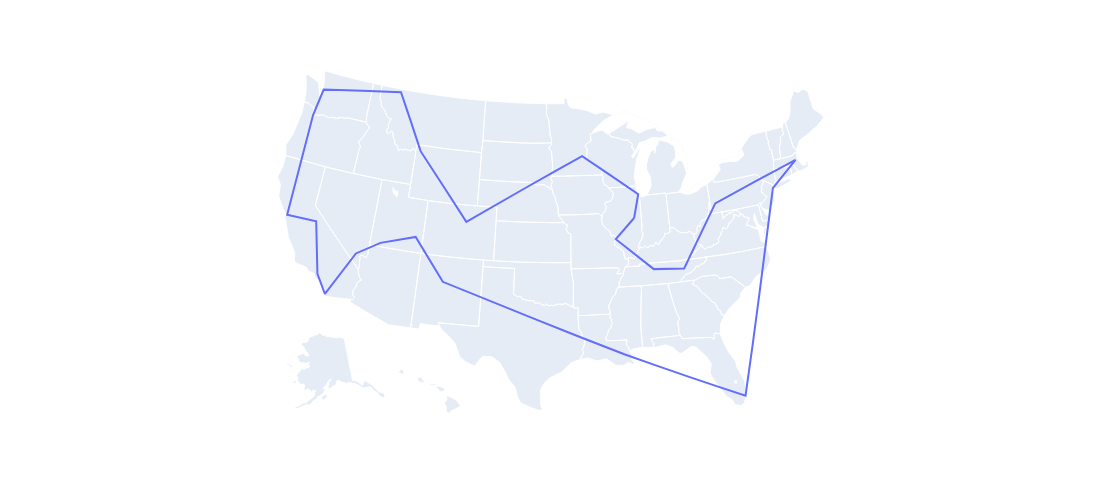

In [50]:
fig = px.line_geo(LongLat,lat="Latitudes",lon="Longitudes",hover_name="Locations")
fig.update_layout(geo_scope="usa",height=500)
fig.show()